In [95]:
using Revise
using CMBLensing
using CMBLensing: get_‚Ñì‚Å¥C‚Ñì, HP, LP, Field, Flat, fieldvalues, S0, S2
using CMBFieldsBase
using JLD
using PyPlot
using Parameters
using PyCall
@pyimport seaborn.apionly as sns

In [2]:
rc("xtick",top=true,bottom=true,direction="in",labelsize=12)
rc("ytick",left=true,right=true,direction="in",labelsize=12)
rc("axes",labelsize=16,titlesize=16)
rc("legend",frameon=false,fontsize=12)
rc("figure",figsize=(6.4,4.8))

# Unmasked

## Load

In [4]:
# dat = load("../dat/run2_256_3_teb_r05_lf7_20wauto.jld")

# @unpack T,Œòpix,nside,œï,f,fÃÉ,d = dat["rundat"]
# @unpack fcur,fÃÉcur,œïcur = dat["trace"][end]

# fest,fÃÉest,œïest = fcur,fÃÉcur,œïcur
# œïtrue,ftrue,fÃÉtrue = œï,f,fÃÉ;

In [179]:
dat = load("../dat/run2_1024_3_teb_r05_lf7_30wauto_seed0.jld")
# dat = load("../dat/run2_512_3p_3b_eb_r05_lf7_mask_20wauto_seed0.jld")
# dat = load("../dat/run2_512_3p_3b_eb_r05_lf7_mask_20wauto_seed0_lmaxhack2000.jld")

@unpack T,Œòpix,nside,C‚Ñìf,C‚Ñìn,œï,f,fÃÉ,d = dat["rundat"]
@unpack fcur,fÃÉcur,œïcur = dat["trace"][end]
C‚ÑìfÃÉ = Dict(k=>C‚Ñìf[Symbol("ln_$k")] for (k,v) in C‚Ñìf if Symbol("ln_$k") in keys(C‚Ñìf))

fest,fÃÉest,œïest = fcur,fÃÉcur,œïcur
œïtrue,ftrue,fÃÉtrue = œï,f,fÃÉ;

In [180]:
# t = 2dat["rundat"][:target_lnP]
# (-2dat["trace"][end][:lnP] - t) / sqrt(2t)

In [181]:
t = -2dat["rundat"][:target_lnP]
(-2dat["trace"][end][:lnP1] - t) / sqrt(2t)

-1.7448212f0

## Plots

### œï

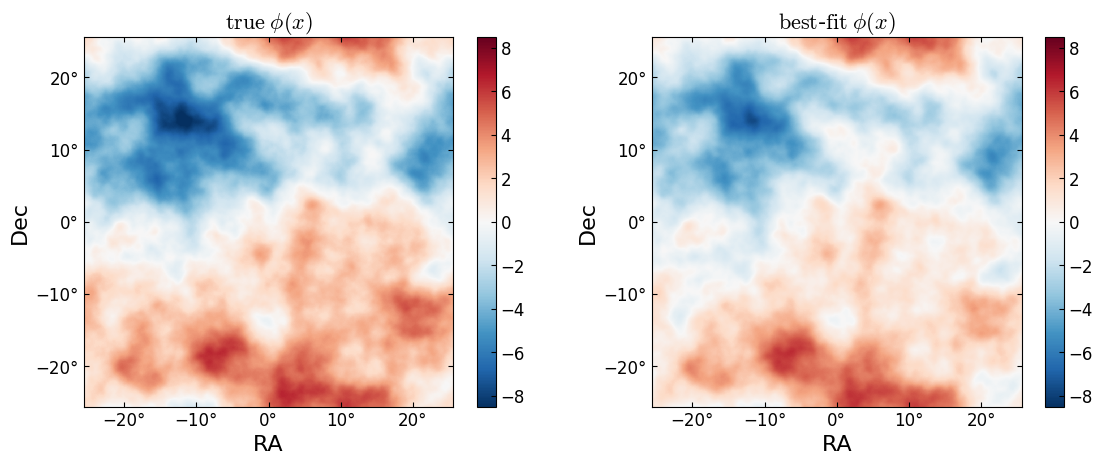

In [185]:
_,axs = plot(1e5.*[œïtrue,œïest]',vlim=8.5)
axs[1][:set_title](raw"${\rm true}\;\phi(x)$")
axs[2][:set_title](raw"${\rm best}$"*"-"*raw"${\rm fit}\;\phi(x)$")
savefig("../paper/figs/phiest.pdf",bbox_inches="tight")

### B

In [183]:
P = Flat{Œòpix,nside}
Cf = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚Ñìf[k] for k=(:tt,:ee,:bb,:te))...)
CfÃÉ = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚ÑìfÃÉ[k] for k=(:tt,:ee,:bb,:te))...)
Cn = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚Ñìn[k] for k=(:tt,:ee,:bb,:te))...);

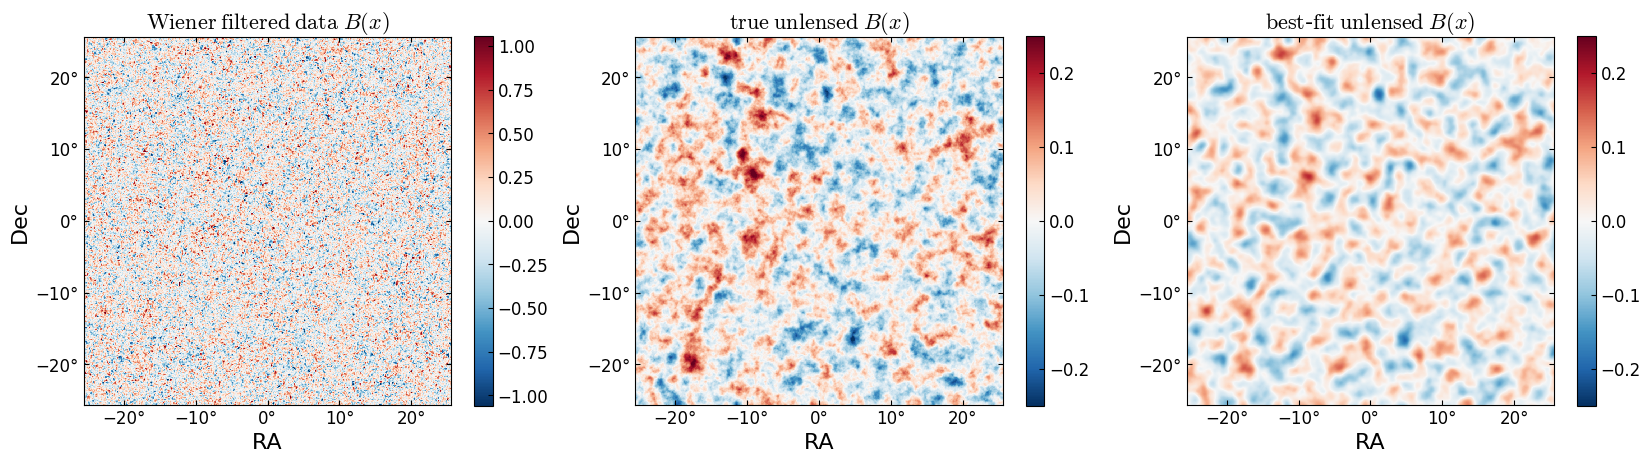

In [186]:
_,axs = plot([nan2zero.(ùïé(CfÃÉ,Cn)*d),f,fcur]',which=[:Bx])
axs[1][:set_title](raw"${\rm Wiener\;filtered\;data}\;B(x)$")
axs[2][:set_title](raw"${\rm true\;unlensed}\;B(x)$")
axs[3][:set_title](raw"${\rm best}$-${\rm fit\;unlensed}\;B(x)$")

vlim = 0.25
axs[2][:get_children]()[end-1][:set_clim](-vlim,vlim)
axs[3][:get_children]()[end-1][:set_clim](-vlim,vlim)

savefig("../paper/figs/Best.pdf",bbox_inches="tight")

### Powerspec difference

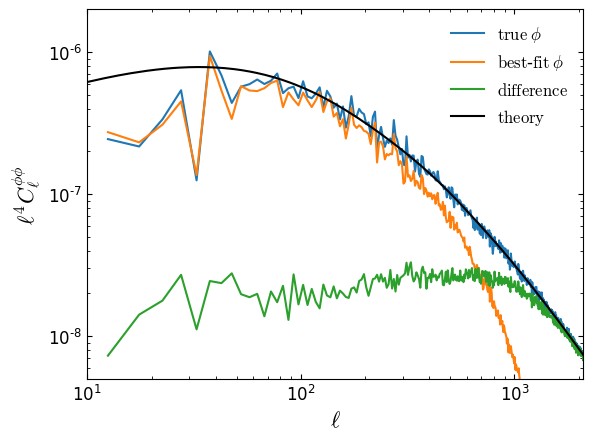

PyObject <matplotlib.text.Text object at 0x7fb0d4eb3908>

In [134]:
let Œî‚Ñì=5,
    ‚Ñìedges=10:Œî‚Ñì:16000;
    loglog(get_‚Ñì‚Å¥C‚Ñì(œïtrue,Œî‚Ñì=Œî‚Ñì,‚Ñìedges=‚Ñìedges)..., label=raw"$\rm true \; \phi$")
    loglog(get_‚Ñì‚Å¥C‚Ñì(œïest,Œî‚Ñì=Œî‚Ñì,‚Ñìedges=‚Ñìedges)...,label=raw"$\rm best$-$\rm fit\; \phi$")
    loglog(get_‚Ñì‚Å¥C‚Ñì(œïest-œïtrue,Œî‚Ñì=Œî‚Ñì,‚Ñìedges=‚Ñìedges)..., label=raw"$\rm difference$")
    loglog((@. C‚Ñìf[:‚Ñì]^2*(C‚Ñìf[:‚Ñì]+1)^2*C‚Ñìf[:œïœï]),"k", label=raw"$\rm theory$")
    legend(loc="upper right")
    ylim(5e-9,2e-6)
#     ylim(1e-5,1e-3)
end
xlim(10,2100)
xlabel(raw"$\ell$")
ylabel(raw"$\ell^4 C_\ell^{\phi \phi}$")

# savefig("../paper/figs/phispec.pdf",bbox_inches="tight")

### trace

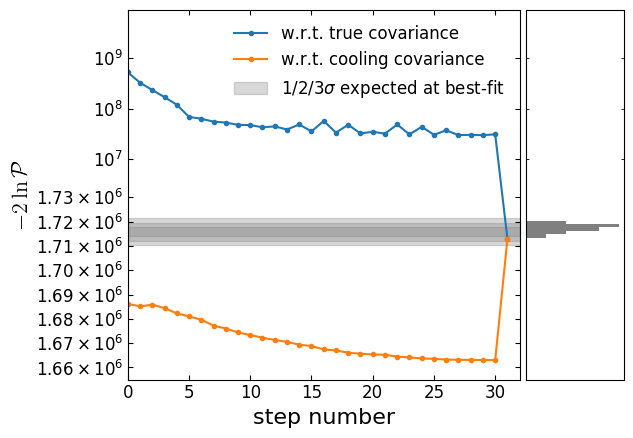

In [287]:
rc("mathtext",fontset="dejavusans")

g = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax = subplot(g[1])

plot(-2getindex.(dat["trace"],:lnP1),".-",label=raw"w.r.t. true covariance")
plot(-2getindex.(dat["trace"],:lnPw),".-",label=raw"w.r.t. cooling covariance")

t = -2mean(load("../dat/target_lnPs_1024_3_teb_lmaxdat3000.jld","target_lnPs"))
for y=1:3
    fill_between([0,length(dat["trace"])], (fill(t+y*x*sqrt(2t),2) for x=[1,-1])..., 
            color="gray", alpha=0.3, label=y==1?raw"1/2/3$\sigma$ expected at best-fit":nothing)
end

legend(loc="upper right")

xlabel("step number")
ylabel(raw"$-2\ln\mathcal{P}$",usetex=true)


yscale("symlog",linthreshy=1.73e6,linscaley=75)
ylim(1.655e6,9e9)
xlim(0,32)
ax[:set_yticks]([(1.66:0.01:1.73)*1e6;1e7;1e8;1e9])
ax[:set_yticklabels]([[@sprintf("\$%.2f \\times 10^6\$",x) for x=(1.66:0.01:1.73)];["\$10^$i\$" for i=7:9]])
ax[:set_xticks](0:5:31)

ax = subplot(g[2])
œá¬≤s = -2load("../dat/lnPs.jld","lnPs")
ax[:hist](œá¬≤s, bins=5, orientation="horizontal", color="gray")#plt[:rcParams]["axes.prop_cycle"][:by_key]()["color"][3])
yscale("symlog",linthreshy=1.73e6,linscaley=75)
ylim(1.655e6,9e9)
ax[:set_yticks]([])
ax[:set_xticks]([])

subplots_adjust(wspace=0.025)

savefig("../paper/figs/lnPtrace.pdf",bbox_inches="tight")

# Masked

## Load

In [189]:
T = Float64
P = Flat{2,512};

In [190]:
# dat = load("../dat/ethan/sim_out512_3p0.jld");

In [191]:
dat = load("../dat/ethan/test_with_masking_v2_0x5385d718219193ec_512_2p0.jld")

Dict{String,Any} with 19 entries:
  "cl"               => CMBFieldsBase.Cl{CMBFieldsBase.Flat{2.0,512},Float64}([‚Ä¶
  "lncl"             => CMBFieldsBase.Cl{CMBFieldsBase.Flat{2.0,512},Float64}([‚Ä¶
  "ncl_invbeam"      => CMBFieldsBase.Cl{CMBFieldsBase.Flat{2.0,512},Float64}([‚Ä¶
  "nside"            => 512
  "bFWHM_rad"        => 0.000581776
  "Px"               => CMBFieldsBase.Flat{2.0,512}
  "Tx"               => Float64
  "lntpœï‚Çí"           => JLD.##Lense.TPŒ¶{1,CMBFieldsBase.Flat{2.0,512},Core.Floa‚Ä¶
  "Œòpix"             => 2.0
  "tpœï_unlensed_cls" => JLD.##Lense.TPŒ¶{0,CMBFieldsBase.Flat{2.0,512},Core.Floa‚Ä¶
  "tpœï‚Çí"             => JLD.##Lense.TPŒ¶{0,CMBFieldsBase.Flat{2.0,512},Core.Floa‚Ä¶
  "dtpœï"             => JLD.##Lense.TPŒ¶{1,CMBFieldsBase.Flat{2.0,512},Core.Floa‚Ä¶
  "ncl"              => CMBFieldsBase.Cl{CMBFieldsBase.Flat{2.0,512},Float64}([‚Ä¶
  "ŒºKarcminT"        => 1.0
  "tpœïWF"            => JLD.##Lense.TPŒ¶{0,CMBFieldsBase.Flat{2.0,512},Core.Floa‚Ä¶

type Lense.TPŒ¶{0,CMBFieldsBase.Flat{2.0,512},Core.Float64} not present in workspace; reconstructing


In [192]:
Œòpix,nside = 2,512;

In [193]:
fshift(f) = (f=≈Å(f); typeof(f)(map(fftshift,fieldvalues(f))...))

fshift (generic function with 1 method)

In [194]:
œïtrue = FlatS0Fourier{T,P}(dat["lntpœï‚Çí"].œï.Il) |> fshift;
œïest = FlatS0Fourier{T,P}(dat["tpœï_curr0"].œï.Il) |> fshift;
ftrue = FieldTuple(fshift(FlatS0Fourier{T,P}(dat["tpœï‚Çí"].t.Il)),fshift(FlatS2EBFourier{T,P}(fieldvalues(dat["tpœï‚Çí"].p)...)));
fest = FieldTuple(fshift(FlatS0Fourier{T,P}(dat["tpœï_curr0"].t.Il)),fshift(FlatS2EBFourier{T,P}(fieldvalues(dat["tpœï_curr0"].p)...)));
d = FieldTuple(fshift(FlatS0Fourier{T,P}(dat["dtpœï"].t.Il)),fshift(FlatS2EBFourier{T,P}(fieldvalues(dat["dtpœï"].p)...)));

## Plots

### œï

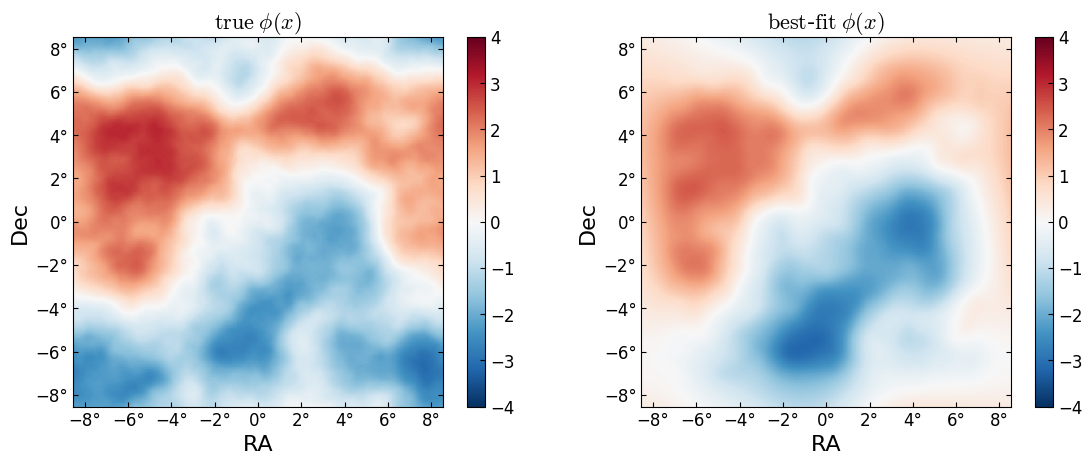

In [150]:
_,axs = plot(1e5.*[œïtrue,œïest]',vlim=4)
axs[1][:set_title](raw"${\rm true}\;\phi(x)$")
axs[2][:set_title](raw"${\rm best}$"*"-"*raw"${\rm fit}\;\phi(x)$")
savefig("../paper/figs/phiest_masked.pdf",bbox_inches="tight")

### B

In [195]:
P = Flat{Œòpix,nside}
Cf = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚Ñìf[k] for k=(:tt,:ee,:bb,:te))...)
CfÃÉ = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚ÑìfÃÉ[k] for k=(:tt,:ee,:bb,:te))...)
Cn = C‚Ñì_to_cov(T,P,S0,S2, C‚Ñìf[:‚Ñì], (C‚Ñìn[k] for k=(:tt,:ee,:bb,:te))...);

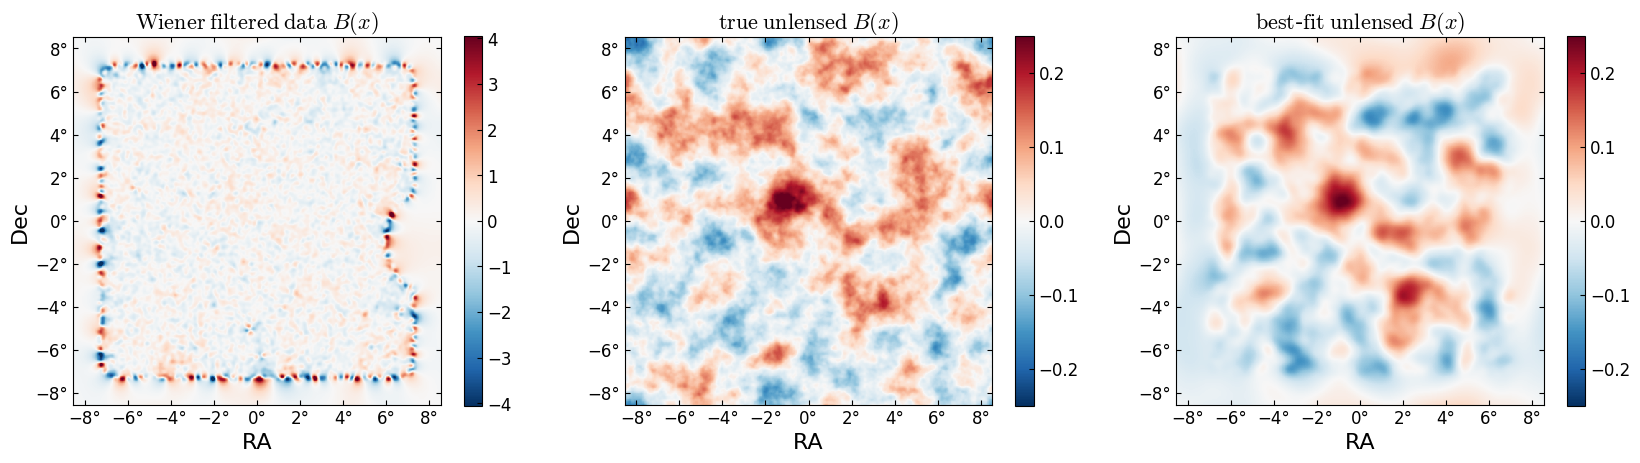

In [196]:
_,axs = plot([nan2zero.(ùïé(CfÃÉ,Cn)*d),ftrue,fest]',which=[:Bx])
# _,axs = plot([nan2zero.(ùïé(Cf,Cn+(CfÃÉ-Cf))*d),ftrue,fest]',which=[:Bx])
axs[1][:set_title](raw"${\rm Wiener\;filtered\;data}\;B(x)$")
axs[2][:set_title](raw"${\rm true\;unlensed}\;B(x)$")
axs[3][:set_title](raw"${\rm best}$-${\rm fit\;unlensed}\;B(x)$")

vlim = 0.25
axs[2][:get_children]()[end-1][:set_clim](-vlim,vlim)
axs[3][:get_children]()[end-1][:set_clim](-vlim,vlim)

savefig("../paper/figs/Best_masked.pdf",bbox_inches="tight")

# Scratch